In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importin training dataset


In [13]:
#Importing the training set
path_file= file_path = 'C:/Users/user/Documents/Bussnis computing/RNN stock price prediction/Google_Stock_Price_Train.csv'
dataset_train = pd.read_csv(file_path, header=0)
training_set = dataset_train.iloc[:, 1:2].values
print(dataset_train.head())


       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


In [14]:
#feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [24]:
#creating a data structure with 60 timesteps and 1 output
X_train = []
y_train =[]
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
#Initialising the RNN
regressor = Sequential()

In [26]:
#Adding a First LSTM layer and some Dropout regulation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [27]:
#Adding a second LSTM layer and some Dropout regulation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [28]:
#Adding a third LSTM layer and some Dropout regulation
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

In [29]:
#Adding a fourth LSTM layer and some Dropout regulation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [32]:
#Adding the output Layer
regressor.add(Dense(units = 1))

In [33]:
#Compiling the RNN
regressor.compile(optimizer ='adam', loss = 'mean_squared_error')

In [34]:
#fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 20s 142ms/step - loss: 0.0992
Epoch 2/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0075
Epoch 3/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0058
Epoch 8/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0057
Epoch 9/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0058
Epoch 10/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0054
Epoch 11/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0043
Epoch 13/100

38/38 [==============================] - 5s 141ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0013


In [36]:
#Load the real stock price of 2017
path_file= file_path = 'C:/Users/user/Documents/Bussnis computing/RNN stock price prediction/Google_Stock_Price_Test.csv'
dataset_test = pd.read_csv(file_path, header=0)
real_stock_price = dataset_test.iloc[:, 1:2].values
print(dataset_test.head())

       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400


In [40]:
#Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

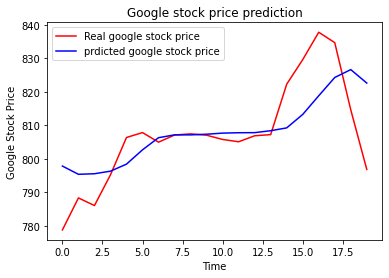

In [41]:
#Visualising the results
plt.plot(real_stock_price, color= 'red', label ='Real google stock price')
plt.plot(predicted_stock_price, color ='blue', label = 'prdicted google stock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()